In [1]:
import control as control
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from scipy import signal

In [2]:
df=pd.DataFrame
df1=pd.read_excel("ihsg.xlsx")
df1=df1['close']

In [3]:
series=pd.Series(df1)

In [4]:
x,y,z=signal.spectrogram(series)

In [5]:
maxresult=0
maxindex=0
minresult=0
result=np.zeros(3222,dtype=object)
for i in range(1,300):
    result[i]=np.zeros(3222,dtype=object)
for i in range(1,300):  
    result[i] = seasonal_decompose(series, model='additive', freq=i,two_sided=False).seasonal
    tmpmax=max(result[i])
    tmpmin=min(result[i])
    if (tmpmax>maxresult):
        maxresult=max(result[i])
        maxindex=i
    if (tmpmin<minresult):
        minresult=min(result[i])
        minindex=i

In [6]:
maxindex,minindex

(292, 291)

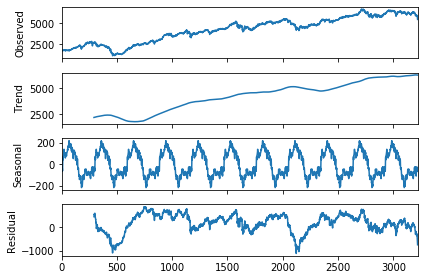

In [11]:
finalresult=seasonal_decompose(series, model='additive', freq=292,two_sided=False)
finalresult.plot()
pyplot.show()

In [13]:
finaltrend=finalresult.trend.dropna()
finalseasonal=finalresult.seasonal.dropna()
finalresidual=finalresult.resid.dropna()

In [31]:
finalseasonalcut=finalseasonal[292:3221]

In [32]:
finalresidual.shape

(2929,)

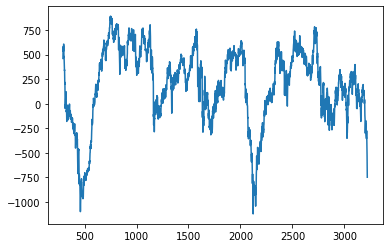

In [42]:
plt.plot(finalresidual)

In [66]:
dfout=df(finalseasonal[0:292])
dfout.to_excel(excel_writer='./result.xlsx')

In [69]:
dfout2=df(finalseasonal)
dfout2.to_excel(excel_writer='./result2.xlsx')

In [70]:
dfout3=df(finaltrend)
dfout3.to_excel(excel_writer='./result3.xlsx')

In [71]:
dfout4=df(finalresidual)
dfout4.to_excel(excel_writer='./result4.xlsx')